# Final Project Template
## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:
Your data must be publically available for free.
Your data should be interesting to you. You want your final project to be something you're proud of.
* Your data should be "big enough":
* It should have at least 1,000 rows.
* It should have enough of columns to be interesting.
* If you have questions, contact a member of the instructional team.


## 2) Provide a link to your data
Your data is required to be free and open to anyone. As such, you should have a URL which anyone can use to download your data:

* Data that I use in this notebook

https://archive.ics.uci.edu/ml/datasets/Adult


### FROM UCI Dataset details

Donor: 

Ronny Kohavi and Barry Becker 
Data Mining and Visualization 
Silicon Graphics. 
e-mail: ronnyk '@' live.com for questions. 


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year. 


Attribute Information:

### Listing of attributes: 

 

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
*  fnlwgt: continuous. final weight. In other words, this is the number of people the census believes the entry represents.. 
*  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
*  education-num: continuous. 
*  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
*  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
*  relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
*  race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
*  sex: Female, Male. 
*  capital-gain: continuous. 
*  capital-loss: continuous. 
*  hours-per-week: continuous. 
*  native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
*  income: >50K, <=50K.


Relevant Papers:

Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996 
[Web Link]


Date and Time this was run:

In [1]:
import datetime
datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S")

'Tue, 03 December 2019 23:22:17'

In [2]:
#Imports as needed
# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [3]:
print("Imports:")
print("NumPy: ",np.__version__)
print("Pandas: ",pd.__version__)

Imports:
NumPy:  1.17.4
Pandas:  0.25.3


In [4]:
# List files available
print(os.listdir("."))

['.DS_Store', '.git', '.ipynb_checkpoints', '1', 'adult.data', 'adult.data.csv', 'adult.names', 'adult.test', 'BIOF_003.ipynb', 'bkup_MR_RD_BIOF509_Final_Project.ipynb', 'Dummy.ipynb', 'gh', 'Intro_to_ML.ipynb', 'Intro_to_ML_Chp2.ipynb', 'MR_RD_BIOF509_Final_Project.ipynb', 'myheadings', 'Old_final-project.ipynb', 'postBuild', 'README.md', 'requirements.txt', 'Scikit_Learn_Cheat_Sheet_Python.pdf', 'SHAP_Library.ipynb', 'Skeleton_Version.ipynb', 'test.csv', 'train.csv', 'UCI Machine Learning Repository: Adult Data Set.webarchive', 'UCI_DataSet_Snapshot.jpg', 'UCI_DataSet_Snapshot.png', 'Untitled.ipynb', 'Untitled1.ipynb', 'x1.ipynb']



## 3) Import your data

In the space below, import your data. If your data span multiple files, read them all in. 
If applicable, merge or append them as needed.

In [5]:
# Let us setup columns
h =['age', # continuous.
'workclass',# Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
'fnlwgt', # continuous.
'education', # Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
'education-num', # continuous.
'marital-status', # Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
'occupation', # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
'relationship', # Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
'race', # White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
'sex', # Female, Male.
'capital-gain', # continuous.
'capital-loss', # continuous.
'hours-per-week', # continuous.
'native-country', # United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'income' # Over or under 50K    
   ]
# Use index_col to stop age(first column) being used as index column
medData = pd.read_csv('adult.data', names=h, index_col=False) 

## 3.1 Display a correlation matrix

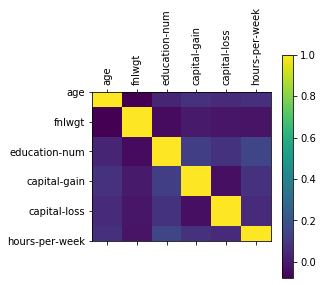

In [6]:
# From: https://github.com/practicalAI/practicalAI/blob/master/notebooks/03_Pandas.ipynb
# Correlation matrix
"""
This would be only Numeric/Continuous variables
"""
plt.matshow(medData.corr()) 
continuous_features = medData.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='90')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='0')
plt.colorbar();
plt.show();

# 4) Show me the head of your data.

## 4.1 Describe Data

### 4.1.1 Data Types

In [7]:
medData.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### 4.1.2 Describe the Columns and the distribution of the Data in the Data Frame

In [8]:
medData.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
### 4.1.3 Head of the Data

In [10]:
medData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 4.1.4 Group by income and plot the histogram of the column distribution 

income
 <=50K    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
 >50K     [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

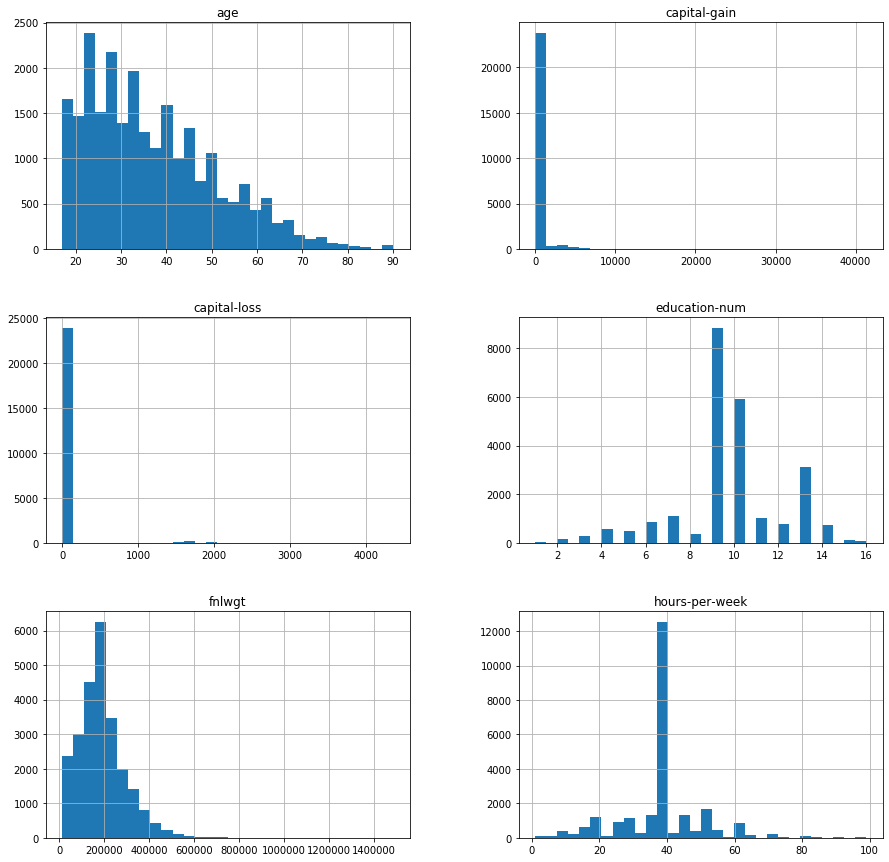

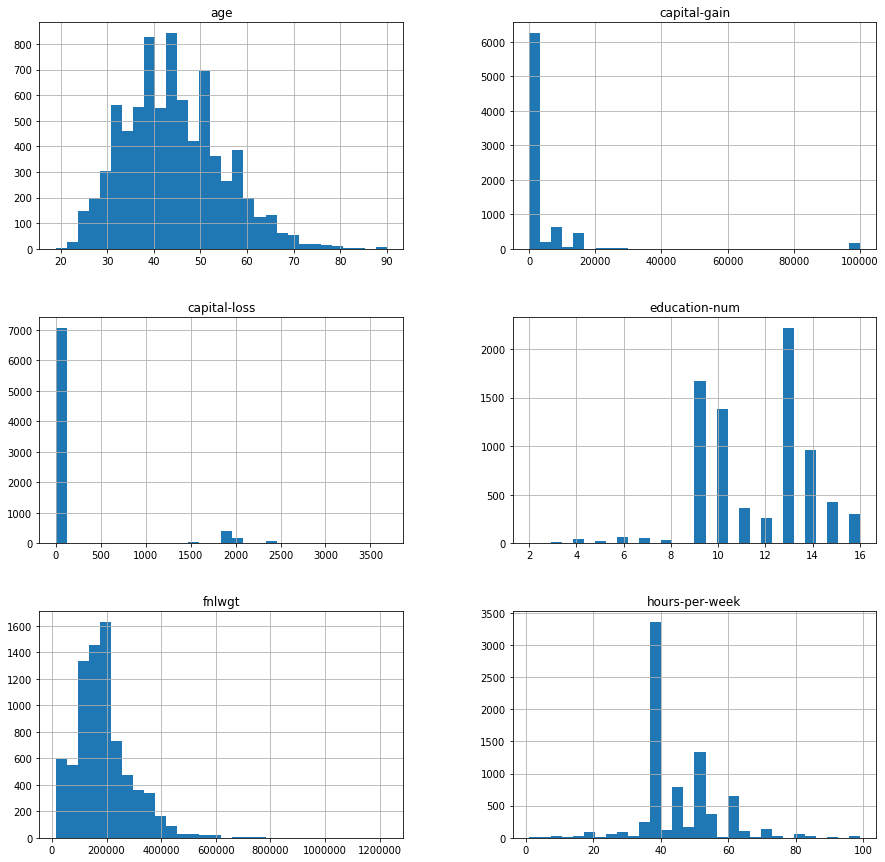

In [11]:
medData.groupby('income').hist(bins=30, figsize=(15, 15))

# 5) Show me the shape of your data.

In [12]:
medData.shape

(32561, 15)

## 5.1) Unique Values by Column

In [13]:
medData.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

# 6) Show me the proportion of missing observations for each column of your data

##    6.1) Let us convert missing observations for each column of data to NaN so that we can count

* All of the MISSING data is coded as " ?" in the data set


In [14]:
#medData.isin(['?'])[15] # https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe
#medData = medData.replace(" ?", np.NaN)
medData = medData.replace(" ?", np.NaN)

* Replaced " ?" in the data set with np.NaN; count NA values

##    6.2) Missing observations for each column of your data

In [15]:
missing_data = (medData.isna().sum()).to_frame()
missing_data['pct'] = round(missing_data[0]*100/len(medData),2)
missing_data

,0,pct
age,0,0.00
workclass,1836,5.64
fnlwgt,0,0.00
education,0,0.00
education-num,0,0.00
marital-status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


## Building our test and train Data Frame from the Census Data

In [16]:
"""
Since we have categorical values, we will use get_dummies to convert them to continuous values for our model
"""
df = pd.get_dummies(medData)
"""
Now let us drop the last column as this will be our prediction
"""
df = df.drop('income_ <=50K', axis=1)
"""
Display head of the final dataset to be used by the models
"""
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0



# 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.



# Question: 

## * Does this person make over 50K?

## Let us build the X (data) and y (target) variables for our models below

In [17]:
# All but the last column in the dataframe will be our data
X = df.iloc[:,:-1] 

# The last column in the dataframe will be our target/prediction
y = df.iloc[:,-1]

In [18]:
## Data which is all except income above 50K column
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
## Target which is the income above 50K column
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income_ >50K, Length: 32561, dtype: uint8

# 8) What is your y-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

## The y-variable that we will predict is if a person's income is above 50K

### Let us split the data into test and train

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Now with this test train split model, let us use K Nearest Neighbors (KNN) as the first model for our prediction

### KNN Classification with Cross Validation Scores for 10 neighbors and 6 CV

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
neighCV = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(neighCV, X, y, cv=6)
cv_results['test_score']

array([0.79546711, 0.79988944, 0.793993  , 0.79473005, 0.79546711,
       0.79561371])

### KNN Classification with Cross Validation Scores for 20 neighbors and 12 CV

In [22]:
neighCV = KNeighborsClassifier(n_neighbors=20)
cv_results = cross_validate(neighCV, X, y, cv=12)
cv_results['test_score']

array([0.79439941, 0.79845247, 0.79734709, 0.79955785, 0.79918939,
       0.7965352 , 0.80206414, 0.79395503, 0.80206414, 0.80058975,
       0.80427571, 0.79727239])

## KNN Classification with Cross Validation Scores for 10 or 20 neighbors with 6 or 12 CV yield about 80% accuracy

In [23]:
# creating odd list of K for KNN
neighbors = list(range(5, 31, 5))

# empty array that will hold cv scores
cv_scores = []

# perform k-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=10)
    knn.fit(X_train,y_train)
    scores = cross_validate(knn, X_train, y_train, cv=5)
    cv_scores.append(scores['test_score'])
    
print(cv_scores)

[array([0.76741522, 0.77286271, 0.77057071, 0.77950951, 0.77303989]), array([0.79170486, 0.79188632, 0.78867752, 0.79486592, 0.79871619]), array([0.79743355, 0.79807472, 0.79211552, 0.79463672, 0.79940394]), array([0.79582951, 0.79555352, 0.79234472, 0.79509512, 0.80284273]), array([0.79422548, 0.79647032, 0.79142792, 0.79509512, 0.80284273]), array([0.79445463, 0.79280312, 0.78890672, 0.79188632, 0.79986245])]


## Calculate and plot the misclassification error

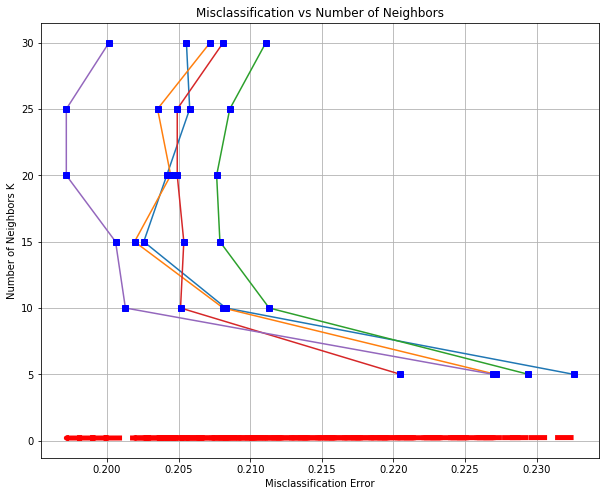

In [24]:
# https://www.ritchieng.com/machine-learning-cross-validation/    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(mse, neighbors)
# red dashes, blue squares and green triangles
plt.plot(mse, mse, 'r--', mse, neighbors, 'bs', linewidth=5)
plt.title("Misclassification vs Number of Neighbors")
plt.ylabel("Number of Neighbors K")
plt.xlabel("Misclassification Error")
plt.show();

## [8.2] Let us try Linear Regression

In [25]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# instantiate
linreg = LinearRegression(n_jobs=10)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

## [8.2.1] Print prediction Coefficients and MSE with R2 Scores

In [26]:
y_pred = linreg.predict(X_test)

# The coefficients
#print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.12
Variance score: 0.36


## Plot a histogram of the linear regression output of prediction vs test difference

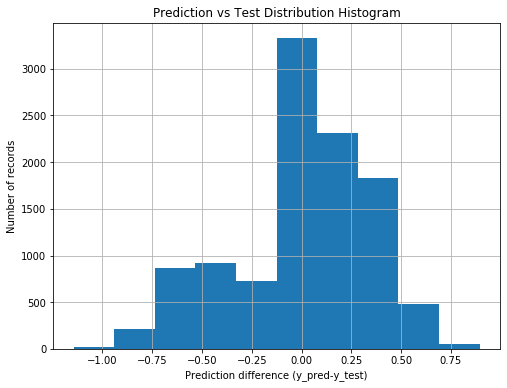

In [27]:
#resid = np.abs(y_pred-y_test)
resid = (y_pred-y_test) # prediction vs test 
plt.figure(figsize=(8,6))
plt.grid(True)
plt.hist(resid);
plt.xlabel('Prediction difference (y_pred-y_test)')
plt.ylabel('Number of records')
plt.title('Prediction vs Test Distribution Histogram')
plt.show()

# The above shows that Linear Regression is not a good fit for our Boolean prediction

## [8.3] Logistic Regression

In [28]:
# import model
from sklearn.linear_model import LogisticRegression
# instantiate
logreg = LogisticRegression(n_jobs=20)

#Get Scores
scores_cv_trn = cross_validate(logreg, X_train, y_train, cv=10)
#print("Training - Logistic Reg CV Sores: {}\n".format(scores_cv_trn));
#print("************************************************************************\n")

#Get Scores
scores_cv_tst = cross_validate(logreg, X_test, y_test, cv=10)
#print("Testing - Logistic Reg CV Sores: {}\n".format(scores_cv_tst));

## The mean CV scores of Test vs Train

In [29]:
print("Testing - Logistic Reg CV Sores: {} ".format(scores_cv_tst['test_score'].mean()));
print("Training - Logistic Reg CV Sores: {}".format(scores_cv_trn['test_score'].mean()));

Testing - Logistic Reg CV Sores: 0.8032747823827465 
Training - Logistic Reg CV Sores: 0.7949114024532451


## Calculate mean CV scores of Test data for CV in increments of 5

In [30]:
# Initialize the CV score array
cv_new = []

# Run a CV for a list from 5-100 in increments of 5
for i in list(range(5,100,5)): 
    #Get Scores
    scores_cv_tst = cross_validate(logreg, X_test, y_test, cv=i)
    cv_new.append((i, scores_cv_tst['test_score'].mean()))

print("Mean Scores (CV, Mean) {}".format(cv_new))

Mean Scores (CV, Mean) [(5, 0.8032754228575758), (10, 0.8032747823827465), (15, 0.8030888582418467), (20, 0.8032731066480231), (25, 0.8024376863446631), (30, 0.8022501984096108), (35, 0.8028089352412566), (40, 0.802907564948741), (45, 0.8029928396277151), (50, 0.8027189741360573), (55, 0.8024402428608374), (60, 0.8022535378263204), (65, 0.80290090641869), (70, 0.802910043782909), (75, 0.8031746956746956), (80, 0.8027177759905568), (85, 0.8030907901218229), (90, 0.8031814002001166), (95, 0.8029010287712762)]


## Plot the Mean Score of the CV values

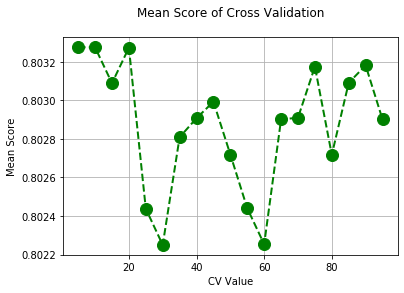

<Figure size 72000x57600 with 0 Axes>

In [31]:
plt.title('Mean Score of Cross Validation\n')
plt.grid(True)
plt.xlabel('CV Value')
plt.ylabel('Mean Score')
plt.plot (*zip(*cv_new),color='green', marker='o', linestyle='dashed',
            linewidth=2, markersize=12, animated=True)
plt.figure(figsize=(1000,800));
plt.show();

## The mean score of 80% does not seem to change based of diffent CV parameters

## K Means Estimates for 3K rows

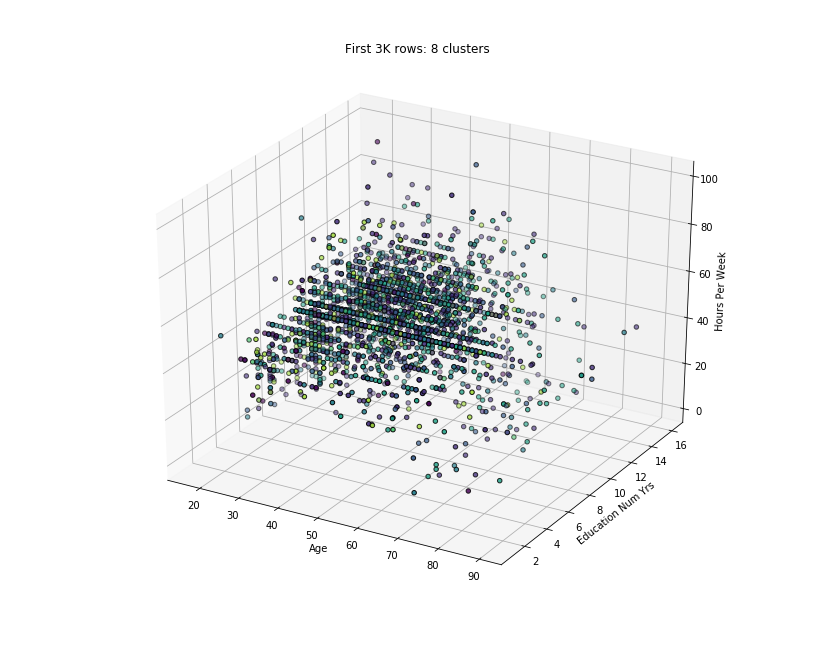

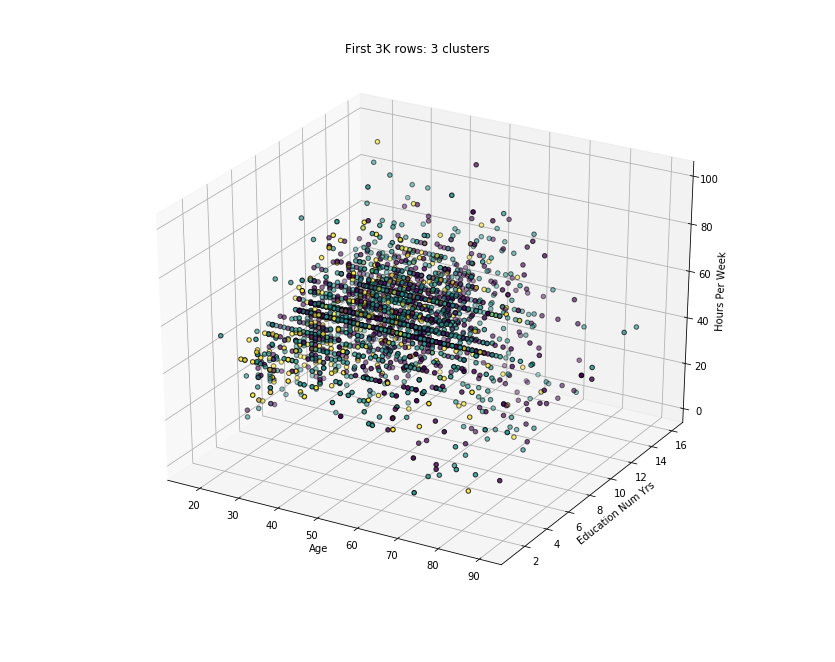

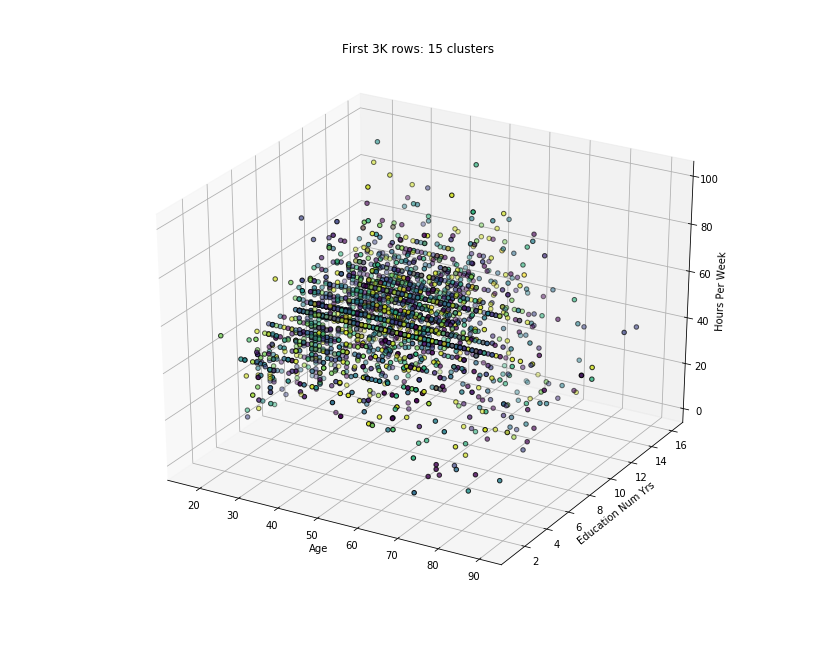

In [32]:
# Let's recreate Data with Categorical values converted to numeric using get_dummies
DmedData = pd.get_dummies(medData)
# Drop the last column as it is redundant, and not needed for our prediction
DmedData = DmedData.drop('income_ <=50K', axis=1)
# X1 is all but last column 
X1 = DmedData.iloc[ :, :-1]
# y1 is last column
y1 = DmedData.iloc[ :, -1:]

# Build an array of 3 estimators that use 8, 3, and 15 clusters
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_15', KMeans(n_clusters=15))]

# Build the titles
fignum = 1
titles = ['First 3K rows: 8 clusters', 'First 3K rows: 3 clusters', 'First 3K rows: 15 clusters']

# Plot the 3 predictions with 3D scatter plots
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(12, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1]) #, elev=60, azim=134)
    est.fit(X1)
    labels = est.labels_

    ax.scatter(X1.iloc[:3000,0], X1.iloc[:3000,2], X1.iloc[:3000,5],
               c=labels[:3000].astype(np.float), edgecolor='k')

    #ax.w_xaxis.set_ticklabels([])
    #ax.w_yaxis.set_ticklabels([])
    #ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Age')
    ax.set_ylabel('Education Num Yrs')
    ax.set_zlabel('Hours Per Week')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

## Let us use Clustering

In [33]:
#***************************
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=2,
    init='k-means++', # default, also: random
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
# Replace with get Dummies as this is categorical data as it does not like fitting
cluster_labels = model.fit_predict(pd.get_dummies(medData))
print(cluster_labels)

[1 1 1 ... 1 1 0]


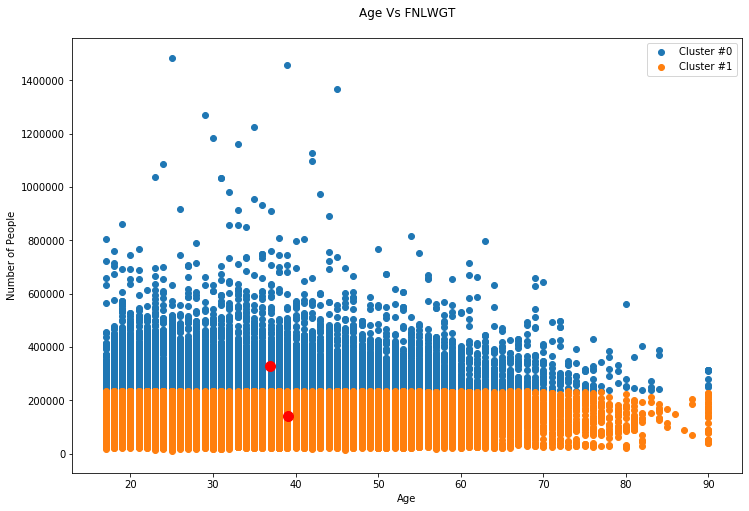

In [34]:
#*******************************
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the medData dataset."""
    plt.figure(figsize=(12,8))
    
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )
    # Set the plot title and Axis labels
    plt.title('Age Vs FNLWGT\n')
    plt.xlabel('Age')
    plt.ylabel('Number of People')
    
#******************************
model = KMeans(
    n_clusters=2,
    init="k-means++", #'k-means++', # default, also: random
    n_init=20, # default, also: 20, 5, 1
    max_iter=20, # default / 1
)

#Prediction and Fit
model.fit_predict(pd.get_dummies(medData))

#Prediction lablels
cluster_labels = model.predict(pd.get_dummies(medData))

#Plot the KMeans of the model with centorids
plot_kmeans(pd.get_dummies(medData), cluster_labels, model, 2)
#*******************************

In [35]:
print('Program completed at:', datetime.datetime.now().strftime("%a, %d %B %Y %H:%M:%S"))

Program completed at: Tue, 03 December 2019 23:27:37
